In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from scipy import stats
import matplotlib.font_manager as fm
[f.name for f in fm.fontManager.ttflist]
plt.rc('font', family ='Malgun Gothic')
mpl.rcParams['axes.unicode_minus'] = False
# from statannot import add_stat_annotation
import plotly.express as px
import statsmodels.api as sm
from scipy.stats import chi2_contingency

In [5]:
#파일을 불러옵니다.
p = pd.read_excel('../../Downloads/(반출금지) 미니프로젝트-쇼핑몰 실습데이터.xlsx')

In [6]:
p

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,초도상품,제작문구 내역,할부기간
0,191213170236874,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-13 17:03:37,구매확정,N,NaN,NaN
1,191216100347429,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-16 10:04:50,구매확정,N,NaN,NaN
2,191216100347429,지니,eHBM셀파수학교실 삼색볼펜-1세트 50개입,HB,3,67500,신용카드,2019-12-16 10:04:50,구매확정,N,NaN,NaN
3,191216173241622,지니,eHBM셀파수학교실 회원용 리플렛-1세트 50권입,HB,2,30000,신용카드,2019-12-16 17:33:43,구매확정,N,NaN,NaN
4,191216173241622,지니,eHBM셀파수학교실-학습계통도(중등 5종),HB,1,750,신용카드,2019-12-16 17:33:43,구매확정,N,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
218596,221108104041264,에이스디포,[스마트 HBE*초도] 입체 액자형 현판,에이스디포,1,35000,웰컴마일,2022-11-08 10:38:21,결제완료,Y,NaN,NaN
218597,221108104041264,에이스디포,[스마트 HBE*초도] 아크릴 사인,HB,1,26900,웰컴마일,2022-11-08 10:38:21,결제완료,Y,NaN,NaN
218598,221108104536307,에이스디포,[스마트 HBM] 아크릴 사인,HB,1,26900,신 + 포,2022-11-08 10:43:15,배송준비,N,NaN,NaN
218599,221108104735216,다우기술,[스타벅스] 아이스 카페 아메리카노 T,스타벅스,1,4050,포인트,2022-11-08 10:45:14,배송완료,N,NaN,NaN


## p 파일 데이터 확인 및 분석

In [7]:
# 주문수량 nan값 확인
p['주문수량'].isna().sum()

0

In [8]:
p['판매금액'].isna().sum()

0

In [9]:
p['결제방법'].isna().sum()

14

In [10]:
p['할부기간'].notna().sum()

1927

In [11]:
p['처리상태'].isna().sum()

0

# 3번 결제 방법에 따른 분석

In [12]:
s = p.copy()

In [13]:
#3.a):맨 앞의 한가지만 사용한 방법으로 데이터를 전처리 합니다.
replace_map = {
    '신 + 포': '신용카드',
    '신 + 적 + 포': '신용카드',
    '신 + 적': '신용카드',
    '신 + 웰컴': '신용카드',
    '적 + 포': '적립금',
    '후 + 포': '후불',
    '후 + 적 + 포': '후불',
    '후 + 적': '후불',
    '정 + 포': '정기결제',
    '정 + 적 + 포': '정기결제',
    '정 + 적': '정기결제',
    '현 + 적': '현금',
    '현 + 포': '현금',
    '현 + 적 + 포': '현금',
    '무통장입금' : '현금',
    '가상계좌' : '현금',
    '현금간편결제' : '현금'
}
# '결제방법' 열의 값을 한 번에 대체합니다.
s['결제방법'] = s['결제방법'].replace(replace_map)

In [14]:
s = s.dropna(subset=['결제방법'])

In [15]:
s = s[~s['결제방법'].isin(['-', ' + 포'])]

In [16]:
s['결제방법'].unique()

array(['신용카드', '현금', '후불', '포인트', '적립금', '웰컴마일', '정기결제'], dtype=object)

In [17]:
s[s['결제방법'] == '정기결제']['판매금액'].min()

600

## 결제방법과 결제금액에 따른 연관성 (boxplot)

Text(0, 0.5, '판매금액(단위:천만)')

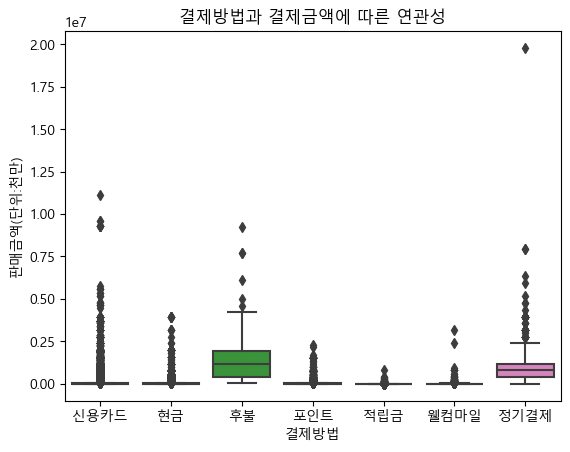

In [18]:
sns.boxplot(data=s, x='결제방법', y='판매금액')
plt.title('결제방법과 결제금액에 따른 연관성')

# X축, Y축을 정의합니다.
plt.xlabel('결제방법')
plt.ylabel('판매금액(단위:천만)')

In [20]:
s['log_판매금액'] = np.log1p(s['판매금액'])

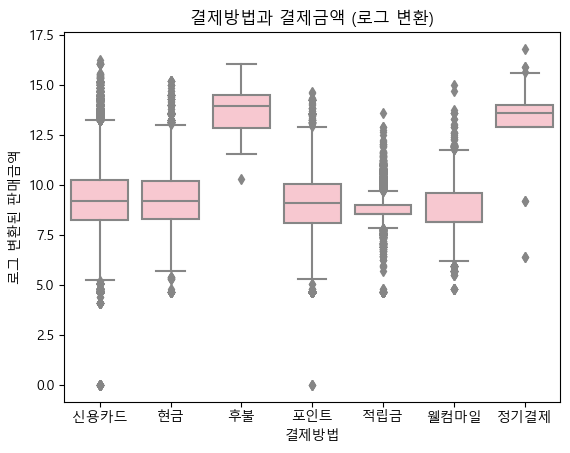

In [22]:
# 박스플롯 생성
sns.boxplot(data=s, x='결제방법', y='log_판매금액', color = 'pink')
plt.title('결제방법과 결제금액 (로그 변환)')
# X축, Y축을 정의합니다.
plt.xlabel('결제방법')
plt.ylabel('로그 변환된 판매금액')
plt.savefig('logprice.png', bbox_inches='tight')
plt.show()

## 카이제곱 검정

In [ ]:
# 카이제곱 검정
# H0= 결제 방법과 결제금액의 연관성이 없다.
chi2_stat, p_val, dof, expected = chi2_contingency(pd.crosstab(s['결제방법'], s['판매금액']))
print("카이제곱 통계량:", chi2_stat)
print("p-value:", p_val)

# p-value가 0.05보다 작으므로, 귀무가설을 기각한다. 따라서 결제 방법과 결제금액의 연관성이 있다.

PR(>F): 0.0
p-value가 0.05보다 작으므로, 결제방법이 판매금액에 유의미한 영향을 미친다고 결론지을 수 있습니다. 실제로 p-value가 0.0이므로, 결제방법과 판매금액 간의 관계가 매우 유의미합니다.